# Tarea 2

_Tarea 2_ de _Benjamín Rivera_ para el curso de __Métodos Numéricos__ impartido por _Joaquín Peña Acevedo_. Fecha limite de entrega __13 de Septiembre de 2020__.

### Como ejecutar

##### Requerimientos

Este programa se ejecuto en mi computadora con la version de __Python 3.8.2__ y con estos
[requerimientos](https://github.com/BenchHPZ/UG-Compu/blob/master/MN/requerimientos.txt)

#### Jupyter

En caso de tener acceso a un _servidor jupyter_ ,con los requerimientos antes mencionados, unicamente basta con ejecutar todas las celdas de este _notebook_. Probablemente no todas las celdas de _markdown_ produzcan el mismo resultado por las 
[_Nbextensions_](jupyter-contrib-nbextensions.readthedocs.io).

#### Consola

Habrá archivos e instrucciones para poder ejecutar cada uno de los ejercicios desde la consola.

#### Si todo sale mal

<a href="https://colab.research.google.com/gist/BenchHPZ/5079d3b77ed0de33f82807bf61345b25/tarea2.ipynb">
    <img src="../../../assets/colab-badge.svg" 
         alt="Open In Colab"/>
</a>

En caso de que todo salga mal, tratare de dejar una copia disponible en __GoogleColab__ que se pueda ejecutar con la versión de __Python__ de _GoogleColab_

In [ ]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import warnings

from math import atan, cos, exp, log, pi, sin
"""
# Para probar que todo sale bien
if __name__ == "__main__":
    import doctest
    doctest.testmod()
    
    if len(sys.argv) >= 2:
        ejercicio = sys.argv[1].lower()

        if ejercicio == 'ejercicio1':
            print(Ejercicio1())
        elif ejercicio == 'ejercicio3':
            print(Ejercicio3())
        elif ejercicio == 'ejercicio4':
            print(Ejercicio4())
        elif ejercicio == 'ejercicio5':
            print(Ejercicio5())
        else:
            print(')= ... =(')
"""
print("Todo bien con la importacion xD")

## Ejercicio 1

Considere la funcion $f(x) = x + \ln\sqrt{x} − 2.5$. Verique que la funcion $g(x) = 2.5 −\ln\sqrt x$ cumple con las condiciones del teorema de punto fijo en el intervalo $I = [1, 3]$, de modo que puede usarse para encontrar una raız de $f(x)$. Estime el numero de iteraciones que requiere el algoritmo de punto fijo para aproximar a la raız de $f(x)$ con un error menor a $10^{−6}$, partiendo de cualquier punto en el intervalo $I$.

\textbf{Respuesta.} Suponemos que $\ln x = \log_e x$. Podemos ver que la funci\'on $g$ es constante, por lo que \'unicamente falta corroborar que 
\begin{equation*} a \leq g(x) \leq b,\quad \forall x \in [a,b] \end{equation*}

Empezamos por verificar los valores para los que $a \leq g(x)$, de manera que
\begin{eqnarray*}
    a &\leq& g(x) \\ && \\
    1 &\leq& 2.5- \ln\sqrt x \\
    0 &\leq& 1.5- \ln\sqrt x \\
    \ln\sqrt x &\leq& 1.5 \\
    &\Downarrow& \\
    \sqrt x &\leq& e^{1.5} \\
    x &\leq& e^3 \sim 20.08
\end{eqnarray*}
Por otro lado, se da que 
\begin{eqnarray*}
    g(x) &\leq& b \\ && \\
    2.5- \ln\sqrt x &\leq& 3 \\
    -ln\sqrt x &\leq& 0.5 \\
    ln\sqrt x &\geq& -0.5 \\
    &\Downarrow& \\
    \sqrt x &\geq& e^{-0.5} \\
    x &\geq& e^{-1} \sim 0.36
\end{eqnarray*}
Por los dos resultados anteriores tenemos que, para todo el intervalo $[1,3]$,se cumple que $a \leq g(x) \leq b$. De manera que la funci\'on $g$ cumple con el \textbf{Teorema de punto fijo} y se puede usar para encontrar una ra\'iz de $f(x)$.

In [6]:
# Funcion, implementacion
def metodo_punto_fijo(g, x, n, t=0,/,v=True):
    """ Implementacion del metodo de punto fijo, esta
    funcion recibe tres parametros obligatorios y uno
    opcional.
    Input:
        g := La derivada de la funcion g del metodo
        x := La aproximaxion de la raiz de f
        n := numero de iteraciones requeridas
        t := Tolerancia de la variable. Default a 0
        
        v := [opcional] Indica si se quiere imprimir 
            las iteraciones en pantalla
    Output:
        (x,k)
        x := aproximaxion de la raiz
        k := ultima iteracion realizada
        
    _Doctest
        >>> metodo_punto_fijo(lambda x : 2.5 - log(x**(1/2)), 2, 20, 1.0e-6, False)
        (2.1234737040050793, 8)
    """
    tp = np.float64     # Tipo de dato para operaciones
    
    if v: print(f"x = {x}")
    for _ in range(n):
        x = tp(g(x))               # Actualizamos el valor de x
        error = abs(x - tp(g(x)))  # Diferencia entre el punto
        
        if v: print(f"\t x={x:2.15e} | error={error:2.15e}")
        if error <= t: break

    return (x,_)

# ejercicio
def Ejercicio1():
    g = lambda x : 2.5 - log(x**(1/2))
    return metodo_punto_fijo(g, 2, 20, 1.0e-6, False)

print(Ejercicio1())

(2.1234737040050793, 8)


\par De manera pr\'actica podemos ver en la celda anterior que se puede encontrar una ra\'iz, con la tolerancia indicada, en 8 iteraciones. 

\textbf{Estimaci\'on} La diferencia entre dos iteraciones del metodo, especificamente con la funcion $g$, esta dada por
\begin{eqnarray*}
    d(x) = \left| g(x) - g(g(x)) \right| &=& \left| 2.5-\ln\sqrt x - \left(2.5 - \ln\sqrt{2.5 - \ln\sqrt x} \right)\right| \\
        &=& \left| 2.5-\ln\sqrt x - 2.5 + \ln\sqrt{2.5 - \ln\sqrt x} \right| \\
        &=& \left| \ln\sqrt{2.5 - \ln\sqrt x} -\ln\sqrt x \right| \\
        &=& \left| \frac{\ln(2.5 - \ln\sqrt x)}{2} - \frac{\ln x}{2} \right| \\
        &=& \left| \frac{1}{2} \, \ln\frac{5- \ln x}{2x}\right|
\end{eqnarray*}

Podemos ver que, si esta funcion no tuviera el valor absoluto ($h$), ser\'ia una funci\'on descendente en el rango $I$. Donde $h(a) = \frac{ln(5/2)}{2} \sim 0.45$, $h(b) = \frac{\, ln(5/6 - 1/6 \, ln(3))}{2} \sim -0.21$, por lo que el rango de la funci\'on $d$ es $[0, 0.45]$. De esto vemos que el mayor _paso_ que podemos dar es de $0.45$. Suponemos que estamos trabajando en una maquina con $64 bits$ , por lo que el _epsilon_ de la maquina es del orden $\epsilon_m \sim e-16$

Sabemos que la ra\'iz de $f$ en  el intervalo $I$ es $\sim 2.1234$. Adem\'as, el valor m\'as alejado de este es 1. Partiendo de $1$ necesitamos primero 3 iteraciones para llegar a $2.1$.

Se necesitan m\'as de 3 iteraciones.


### Como ejecutar

Este ejercicio no tendra implementaci\'on en \textbf{GoogleColab} porque no se requiere correr directamente.

Para ejecutar este ejercicio en __consola__ es importante ubicarse en la misma carpeta del 
[archivo `Tarea2.py`](https://github.com/BenchHPZ/UG-Compu/blob/master/MN/Tareas/T2/Tarea2.py)
y ejecutar el siguiente comando en consola
```console
python3 Tarea2.py Ejercicio1
```
Este programa no espera recibir argumento alguno.

## Ejercicio 2

Explique como usar el __Teorema 1__, junto con alg\'un m\'etodo de c\'alculo de ra\'ices visto en clase para tratar de encontrar todas las ra\'ices de un polinomio, adem\'as mencione la conveniencia de usarlo en funci\'on de $\eta$.

\textbf{Teorema 1}. Todos los ceros del polinomio $p_n(x) = a_{n}x^{n} + a_{n-1}x^{n-1} +\dots+ a_1x + a_0$ de grad $n$ est\'an contenidos en el c\'irculo $\Omega$ del plano complejo definido por
\begin{equation*} \Omega =\{ z\in\mathbb C: |z| \leq 1 + \eta \} \quad\text{con }\eta = \max_{0\leq k\leq n-1}\left| \frac{a_k}{a_n}\right| 
\end{equation*}


__Respuesta__ Con inspiraci\'on en el \textit{ejercicio 4}, tratamos de encontrar una manera de usar el \textbf{Teorema 1} con el \textit{m\'etodo de la secante}.

De manera general podemos considerar que \'unicamente nos interesan los puntos del circulo $\Omega$ cuya parte imaginaria es $0$, esto porque estamos buscando ra\'ices del polinomio en los $\mathbb R$. De manera que, siendo $z$ un numero complejo, $z.r$ la parte su parte real y $z.i$ su parte imaginaria, tenemos que
\begin{eqnarray*}
    |z| &\leq& 1+ \eta \\
    \sqrt{z.r^2 + z.i^2} &\leq& 1+ \eta \\
    \sqrt{z.r^2} &\leq& 1+\eta \\
    |z.r| &\leq& 1+\eta
\end{eqnarray*}

por lo que todos los $x$ del dominio de la funcion $f$ que sean ra\'ices deben de estar en el intervalo $[-(1+\eta), 1+\eta]$. 

__Aqui podemos notar que, mientras m\'as chico sea $\eta$, habra menos valores donde debamos buscar las ra\'ices__

Para poder implementar esta idea con alg\'un m\'etodo, este requeriria ir encontrando las ra\'ices en orden. Dicho de otra manera, un m\'etodo que nos asegure encontrar la ra\'iz m\'as cercana que exista al punto inicial que le otorguemos. Esto nos permitiria poder explorar todo el intervalo creado por el \textbf{Teorema 1} y encontrar todas las ra\'ices del polinomio. 

## Ejercicio 3

__Respuesta__

In [ ]:
# funcion, implementacion
def metodo_secante(f, x0, x1, t, N,/, v=True, tDato=np.float64):
    """ Implementacion del metodo de la secante. Pseudocodigo obtenido de las 
    notas de clase. Argumentos:
        Input:
            f := Funcion fx del metodo.
            x0,x1 := Valores de los puntos iniciales.
            t := Valor de la tolerancia del metodo.
            N := Maximo numero de iteraciones.
            [Opcionales]
            v := [True] Indica si se desea imprimir los resultados 
                en pantalla.
            tDato := [np.float64] Espera uno de los tipos de datos
                de numpy para manejar la presicion dentro del metodo.
        Output:
            (xk, f(xk), k, res)
            xk := Ultimo punto generado por el algoritmo
            f(xk) := Valor del xk evaluado en f
            k := Iteraciones realizadas
            res := Variable formateada como se solicita
                0 -> abs(fxk) < t
                1 -> fxk - fxk1 casi cero
                2 -> ninguna de los anteriores
                
    _Doctest
        >>> metodo_secante((lambda x: x- 2*sin(x)), 1.1, 8.453, 1e-11, 10, False)
        (1.895494267033981, 0.0, 7, 0)
    
    """
    td = tDato # tipo de dato a usar
    # Inicializando variables
    ret = None; t = td(t)
    f0 = td(f(x0)); f1 = td(f(x1))
    x0 = td(x0); x1 = td(x1)
    
    if v: t_x0=x0; t_x1=x1; t_f1=f1;
    
    if abs(f0) < t or abs(f1) < t:
        ret = (x0 if abs(f0)<abs(f1) else x1, 
               f0 if abs(f0)<abs(f1) else f1, 
               0, 0)

    else:
        for k in range(1,N+1):
            if v: print(f'k={k:3d} | xk={x1:9.6f} | f(xk)= {f1:14.7e}')
            
            with warnings.catch_warnings():
                warnings.filterwarnings('error')
                try:
                    # Operacion principal
                    temp = td(x1 - f1*(x1 - x0)/(f1 - f0))
                except RuntimeWarning:
                    ret = (x0 ,  # Regresmos raiz x0 antes de error 
                           f0 ,  # Regresamos evalucaion de raiz antes de error
                           k-1,   # Con k iteraciones
                           1)   # Terminamos por division de casi cero
                    break  # Salimos del bucle
            
            x0, f0 = x1, f1            # Recorrer valores viejos
            x1 = temp; f1 = td(f(x1))  # Guardar y calcular el nuevo valor
            
            if abs(f1) < t: # Verificar tolerancia
                ret = (x1,  # Regresmos posible raiz x1 
                       f1,  # Regresamos evalucaion de raiz
                       k,   # Con k iteraciones
                       0)   # Terminamos porque se alcanzo la tolerancia
                break  # Salimos del bucle
                
        if ret == None:
            ret = (x0 if abs(f0)<abs(f1) else x1,  # Regresamos la ultima posible raiz calculada
                   f0 if abs(f0)<abs(f1) else f1, # Regresamos la evaluacion de la posible raiz
                   k, 2)                # Iteracion k y terminacion por fin de bucle
            
    if v:
        print('Resultado final \n'
              f'\t x0={t_x0:7.4f}, \n\t '
                 f'x1={t_x1:7.4f}, f(x1)= {t_f1:13.9e}, \n\t '
                 f'k ={ret[2]:2d}, xk={ret[0]:6.4f}, f(xk)={ret[1]:8.4e}, \n\t '
               f'res ={ret[-1]}')
        
    return ret

# prueba, ejercicio de las notas de la clase 5
#f = lambda x: x- 2*sin(x)
#print(metodo_secante(f, 1.1, 8.453, 1e-11, 10, False))

In [8]:
# Ejercicio
""" En el diccionario 'funciones' se guardan cada uno de los incisos de 
la parte 3 del ejercicio, esto se hace en el formato [f,x0,x1]. Donde f
es la funcion en formato lambda y x0,x1 son los puntos iniciales del me_
todo.
"""
def Ejercicio3(v=True):
    ret = []
    
    funciones = {
        'a': [(lambda x: exp(2*x)-x-6), 3, 15],
        'b': [(lambda x: 3*cos(3*pi*x) - 4*x), -0.75, -0.8],
        'c': [(lambda x: atan(x)), 0.5, 0.6],
        'd': [(lambda x: atan(x)), 2.0, 2.8]
    }
    t = 2.220446049250313e-16**(1/2) # Tolerancia obtenida de la Tarea1
    N = 30  # Por iluminacion divina

    for f, x0, x1 in funciones.values():
        ret.append( metodo_secante(f, x0, x1, t, N, v=v) )
        if v: print('-'*45 + '\n')
        
    return ret

print(Ejercicio3())

k=  1 | xk=15.000000 | f(xk)=  1.0686475e+13
k=  2 | xk= 3.000000 | f(xk)=  3.9442879e+02
k=  3 | xk= 3.000000 | f(xk)=  3.9442879e+02
k=  4 | xk= 2.510548 | f(xk)=  1.4306670e+02
k=  5 | xk= 2.231968 | f(xk)=  7.8596661e+01
k=  6 | xk= 1.892347 | f(xk)=  3.6129816e+01
k=  7 | xk= 1.603404 | f(xk)=  1.7096730e+01
k=  8 | xk= 1.343858 | f(xk)=  7.3542093e+00
k=  9 | xk= 1.147938 | f(xk)=  2.7851891e+00
k= 10 | xk= 1.028508 | f(xk)=  7.9408843e-01
k= 11 | xk= 0.980878 | f(xk)=  1.3092111e-01
k= 12 | xk= 0.971474 | f(xk)=  7.8274317e-03
k= 13 | xk= 0.970877 | f(xk)=  8.3965349e-05
k= 14 | xk= 0.970870 | f(xk)=  5.4658317e-08
Resultado final 
	 x0= 3.0000, 
	 x1=15.0000, f(x1)= 1.068647458e+13, 
	 k =14, xk=0.9709, f(xk)=3.8192e-13, 
	 res =0
---------------------------------------------

k=  1 | xk=-0.800000 | f(xk)=  4.1270510e+00
k=  2 | xk=-1.007542 | f(xk)=  1.0377431e+00
k=  3 | xk=-1.077258 | f(xk)=  2.0697954e+00
k=  4 | xk=-0.937441 | f(xk)=  1.2562805e+00
k=  5 | xk=-0.721527 | f

### Como ejecutar

[GoogleColab](https://colab.research.google.com/gist/BenchHPZ/.../---.ipynb)
<a href="https://colab.research.google.com/gist/BenchHPZ/.../---.ipynb">
    <img src="../../../assets/colab-badge.svg" 
         alt="Open In Colab"/>
</a>

Para ejecutar este ejercicio en __consola__ es importante ubicarse en la misma carpeta del 
[archivo `Tarea2.py`](https://github.com/BenchHPZ/UG-Compu/blob/master/MN/Tareas/T2/Tarea2.py)
y ejecutar el siguiente comando en consola
```console
python3 Tarea2.py Ejercicio3
```
Este programa no espera recibir argumento alguno. La salida debe ser similar a la siguiente imagen

![Evidencia Ejecucion](assets/E3-1.png)

## Ejercicio 4

__Respuesta__ Es posible que este metodo encuentre puntos que no corresponden a las raices, pero estos son facilmente identificables en la grafica. Este error se da porque no se filtra el resultado res del metodo de la secante.

In [ ]:
# funcion, implementacion
def f_polinomio(coef):
    """ Funcion que genera una funcion polinomial de una 
    variable dados sus coeficientes
    
    _Doctest
        >>> (f_polinomio([1,0,0]))(2)
        4
        
        >>> (f_polinomio([1,0]))(123)
        123
    """
    grado = len(coef)-1
    
    def f(x):
        return sum([coef[n]*x**(grado-n) for n in range(grado+1)])
        
    return f
####
def eta_Teorema1(coef):
    """ Funcion que calcula la variable eta del 
    Teorema 1
    """
    return max([abs(ak/coef[0]) for ak in coef[1:]])
####
def Teorema1(f, eta,/, metodo=metodo_secante):
    """ Impementacion de los conceptos del Teorema 1. 
        
        _Doctest
    """
    t = 2.220446049250313e-16**(1/2) # Tolerancia obtenida de la Tarea 1
    p = 1.0e-2 # Paso entre pruebas; definido arbitrariamente en funcio de la visualizacion de la grafica
    N = 40     # Por iluminacion divina

    I = [-int(eta+1), int(eta+1)] # Limite proporcionado por el Teorema 1
    r_min = metodo(f, I[0], I[0]+2, t, N, False)[0] # Calculamos la raiz mas chica
    r_max = metodo(f, I[1]-2, I[1], t, N, False)[0] # Calculamos la raiz mas grande
    
    ret = [r_min] # Inicializamos la lista de raices y agregamos la menor
    
    if not (r_max <= r_min): # En caso de que sean distintas buscamos mas
        xk = r_min+p
        fa = f(r_min+p) # Evaluacion de raiz anterior
        
        while xk < r_max: # iteramos hasta llegar a la raiz maxima encontrada
            xk += p # Avanzamos un paso entre rmin y rmax
            if f(xk)*fa < 0:  # Buscamos un cambio de signo
                ret.append(metodo(f, xk-p, xk, t, N, False)[0]) # agregamos nueva raiz encontrada
                fa = f(xk) # Actualizamos valor de referencia para cambio de signo
        
        ret.append(r_max) # Agregamos la mas grande
    
    return ret

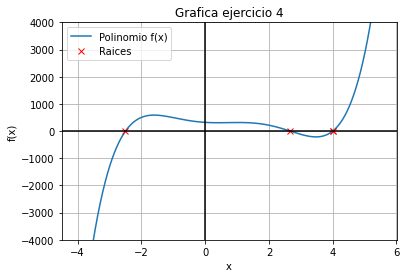

[-2.5000000000005103, 2.666666666666667, 3.9999999999994396, 4.000000000000094]

In [10]:
# ejercicio
def Ejercicio4():
    coef = [6, -25, -24, 110, -72, 320]

    eta = eta_Teorema1(coef)
    f = f_polinomio(coef)

    raices = Teorema1(f, eta)


    """ Grafica del resultado"""
    fig, ax = plt.subplots()  # Inicializar la grafica

    ls = np.arange(raices[0] -2.0, # r min
                   raices[-1]+2.0, # r max
                   0.01)
    ax.plot(ls, [f(x) for x in ls], label='Polinomio f(x)')   # Graficar la funcion
    plt.plot(raices, [f(r) for r in raices], 'rx', label='Raices') # Graficar las raices

    ax.set(xlabel='x', ylabel='f(x)', title='Grafica ejercicio 4')
    # Para mejorar visualizacion
    plt.axis([raices[0] -2.0, # r min 
              raices[-1]+2.0, # r max
              -4000, 4000])   # Arbitrario para limites en y

    plt.legend() # Mostrar leyenda de graficos mostrados
    ax.grid(True) # Mostrar etiquetas de graficas
    ax.axhline(y=0, color='k') # Eje y
    ax.axvline(x=0, color='k') # Eje x

    plt.show()
    
    return raices
    
Ejercicio4()

### Como ejecutar

[GoogleColab](https://colab.research.google.com/gist/BenchHPZ/.../---.ipynb)
<a href="https://colab.research.google.com/gist/BenchHPZ/.../---.ipynb">
    <img src="../../../assets/colab-badge.svg" 
         alt="Open In Colab"/>
</a>

Para ejecutar este ejercicio en __consola__ es importante ubicarse en la misma carpeta del 
[archivo `Tarea2.py`](https://github.com/BenchHPZ/UG-Compu/blob/master/MN/Tareas/T2/Tarea2.py)
y ejecutar el siguiente comando en consola
```console
python3 Tarea2.py Ejercicio4
```
Este programa no espera recibir argumento alguno. La salida debe ser similar a la siguiente imagen

![Evidencia Ejecucion](assets/E4-1.png)

## Ejercicio 5

__Respuesta__

In [ ]:
# funcion, implementacion
def metodo_horner(n, a, x0,/,v=True, td=np.float64):
    """ Implementacion del metodo de horner, basado
    en el pseudocodigo del documento de la tarea.
        Input
            n := Grado del polinomio
            a := Arreglo de coeficientes
            x0 := Punto inicial del metodo
        Output
            (y, b)
            y := evaluacion final
            b := coeficientes de polinomio asociado
    
    _Doctest
        >>> 0
        0
    """
    x0 = td(x0)
    a = [td(c) for c in a] # Normalizar el tipo de dato
    b = a[:]               # Reservar memoria xP
    
    for k in range(1,n):
        b[k] = a[k] - b[k-1]*x0
    return a[-1]-b[-2]*x0

In [12]:
# ejercicio
def Ejercicio5(v=True):
    """ Ejercicio 6 de Tarea 2"""
    dt = np.float64

    coef = [6, -25, -24, 110, -72, 320]
    coef_dx = [30, -100, -72, 220, -72]
    muestras = 20
    
    Ep = 0; Ed = 0
    xs = np.linspace(-5, 5, num=muestras, dtype=dt)
    
    f = f_polinomio(coef)
    df = f_polinomio(coef_dx)
    
    for k in range(20):
        px  = metodo_horner(len(coef), coef, xs[k])
        dpx = metodo_horner(len(coef)-1, coef, xs[k])
        
        dif_p = (f(xs[k]) - px)
        dif_d = (df(xs[k]) - dpx)
        
        Ep += abs(dif_p)
        Ed += abs(dif_d)
        if v: print(f'k={k:3d}\n  px={px:12.6f} | dif_p={dif_p:12.6f}'
                           f'\n dpx={dpx:12.6f} | dif_d={dif_d:12.6f}')
        
    if v: print(f'\n---FIN---\n'
                f'Ep={Ep/20} | Ed={Ed/20}')
    
    return (Ep/20, Ed/20)

print(Ejercicio5())

k=  0
  px= 2835.000000 | dif_p=-30780.000000
 dpx= 2835.000000 | dif_d=25443.000000
k=  1
  px=  788.425780 | dif_p=-16561.514891
 dpx=  788.425780 | dif_d=17684.557377
k=  2
  px=  -45.844732 | dif_p=-7979.828634
 dpx=  -45.844732 | dif_d=11417.915526
k=  3
  px= -212.626585 | dif_p=-3208.668531
 dpx= -212.626585 | dif_d= 6658.427630
k=  4
  px=  -84.690012 | dif_p= -857.931844
 dpx=  -84.690012 | dif_d= 3304.650249
k=  5
  px=  108.161574 | dif_p=   84.470201
 dpx=  108.161574 | dif_d= 1167.421318
k=  6
  px=  250.013584 | dif_p=  310.768406
 dpx=  250.013584 | dif_d=   -1.061857
k=  7
  px=  309.762253 | dif_p=  251.491600
 dpx=  309.762253 | dif_d= -478.164598
k=  8
  px=  312.036645 | dif_p=  133.622630
 dpx=  312.036645 | dif_d= -541.736862
k=  9
  px=  308.120655 | dif_p=   38.754355
 dpx=  308.120655 | dif_d= -441.035243
k= 10
  px=  346.875010 | dif_p=  -38.754355
 dpx=  346.875010 | dif_d= -367.644970
k= 11
  px=  445.659275 | dif_p= -133.622630
 dpx=  445.659275 | dif_d= -4

In [13]:
# alternativas
""" Alternativa a np.linspace"""
def linspace(start, stop, n):
    """ Programa que entrega un arreglo de numeros
    equitativamnte espaciado de n elementos empe_
    zando en start y hasta stop.
    
    _Doctest
        >>> linspace(-5,5,3)
        [-5.0, 0.0, 5.0]
    """
    step = (stop-start)/(n-1)
    return [start+step*(i) for i in range(n)]

### Ejercicio 5

[GoogleColab](https://colab.research.google.com/gist/BenchHPZ/.../---.ipynb)
<a href="https://colab.research.google.com/gist/BenchHPZ/.../---.ipynb">
    <img src="../../../assets/colab-badge.svg" 
         alt="Open In Colab"/>
</a>

Para ejecutar este ejercicio en __consola__ es importante ubicarse en la misma carpeta del 
[archivo `Tarea2.py`](https://github.com/BenchHPZ/UG-Compu/blob/master/MN/Tareas/T2/Tarea2.py)
y ejecutar el siguiente comando en consola
```console
python3 Tarea2.py Ejercicio5
```
Este programa no espera recibir argumento alguno. La salida debe ser similar a la siguiente imagen

![Evidencia Ejecucion](assets/E5-1.png)